# Final Data Science Project
## By: Sebastian Tucker-Kyriakos

In [254]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [342]:
# importing data
file_name = 'Data/train.csv'
DF = pd.read_csv(file_name)

## Questions: 

### Questions 1: Which Variables Have the Greatest Effect on Depression

In [346]:
DF.groupby(['Study Satisfaction', 'Depression']).size().reset_index(name='count')

,Study Satisfaction,Depression,count
0,1.0,0,1594
1,1.0,1,3857
2,2.0,0,2071
3,2.0,1,3769
4,3.0,0,2469
5,3.0,1,3354
6,4.0,0,3095
7,4.0,1,3265
8,5.0,0,2334
9,5.0,1,2089


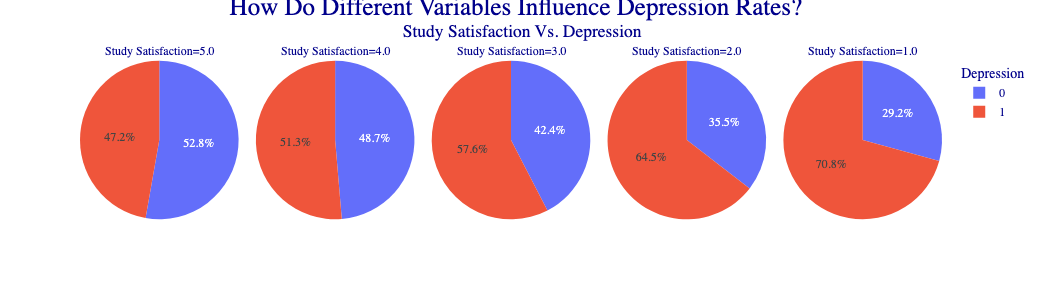

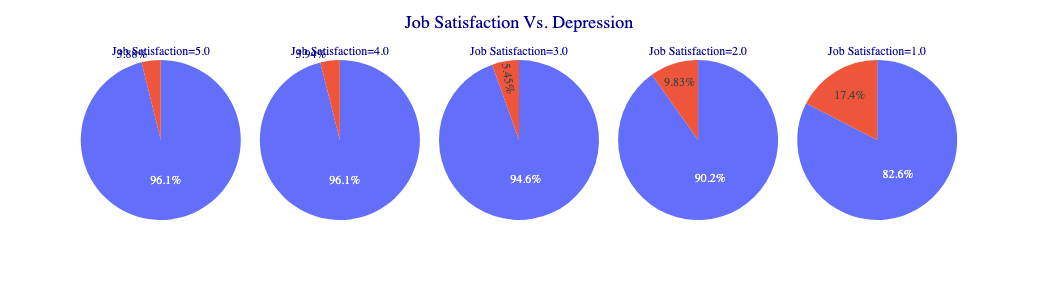

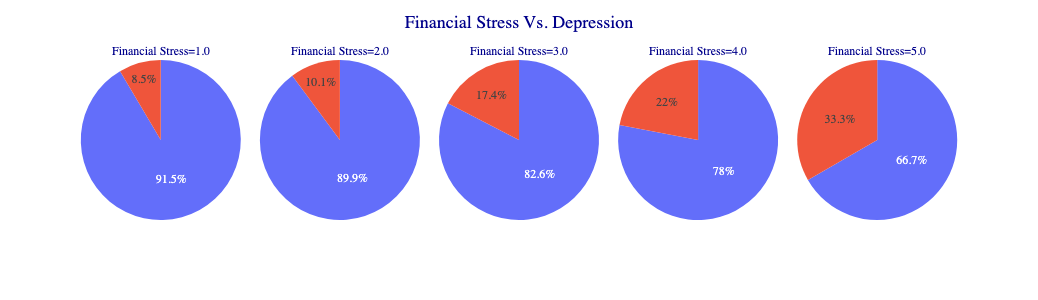

In [355]:
DF_Depression_Influence = (
DF.value_counts(subset=['Study Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Study Satisfaction', ascending=False)

) 
 
fig1 = px.pie(DF_Depression_Influence, 
    values='count', 
    names = 'Depression',
    facet_col='Study Satisfaction',
    color = 'Depression',
    category_orders={'Depression' : [0,1]},
    
)


fig1.update_layout(
    template='ggplot2',
                  legend_title='Depression',
                  width=900,
                  height=300,

    title={
        'font': dict(size=25),
        'text': "How Do Different Variables Influence Depression Rates? <br> <sup>Study Satisfaction Vs. Depression<sup>",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
        'xanchor': 'center',  # Anchor horizontally
        'yanchor': 'top',  # Anchor vertically
         
    },
    font={'family':"Times",'size':12,'color':"Darkblue"}
                      )

fig1.show()


DF_Depression_Influence = (
DF.value_counts(subset=['Job Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Job Satisfaction', ascending=False)

)

fig2 = px.pie(DF_Depression_Influence, 
    values='count', 
    facet_col='Job Satisfaction',
    color = 'Depression',
    facet_col_wrap = 5,
    category_orders={'Depression' : [1,0]},
    
)


fig2.update_layout(
                  width=900,
                  height=300,
    title={
        'font': dict(size=18),
        'text': "Job Satisfaction Vs. Depression",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
    },
        font={'family':"Times",'size':12,'color':"Darkblue"}
                      
)
fig2.show()


DF_Depression_Influence = (
DF.value_counts(subset=['Financial Stress', 'Depression']).reset_index(name='count').sort_values(by='Financial Stress', ascending=True)

)

fig3 = px.pie(DF_Depression_Influence, 
    values='count', 
    facet_col='Financial Stress',
    color = 'Depression',
    facet_col_wrap = 5,
    category_orders={'Depression' : [1,0]},
   
)


fig3.update_layout(
                  width=900,
                  height=300,
    title={
        'font': dict(size=18),
        'text': "Financial Stress Vs. Depression",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
    },
        font={'family':"Times",'size':12,'color':"Darkblue"}
                      
)

fig3.show()

### How does age influence depression

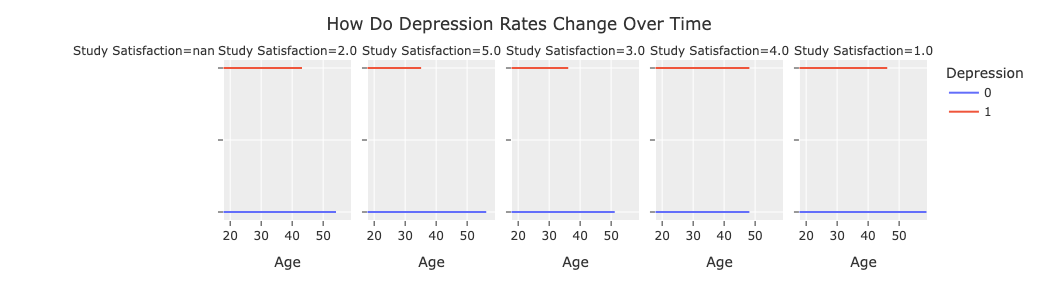

In [352]:
DF_Depression_Influence = (
DF.value_counts(subset=['Study Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Study Satisfaction', ascending=True)

)

fig = px.line(DF, 
    x = 'Age',
    y = 'Depression',
    facet_col='Study Satisfaction',
    color = 'Depression',
)


fig.update_layout(
                  title='How Do Depression Rates Change Over Time',
                  template='ggplot2',
                  legend_title='Depression',
                  width=1000,
                  height=300,
                      )

fig.show()